In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/site-energy-intensity-dataset/y_test.csv
/kaggle/input/site-energy-intensity-dataset/x_test.csv
/kaggle/input/site-energy-intensity-dataset/train_dataset.csv


# Load the dataset

In [2]:
df = pd.read_csv("/kaggle/input/site-energy-intensity-dataset/train_dataset.csv")
test_df = pd.read_csv("/kaggle/input/site-energy-intensity-dataset/x_test.csv")
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


# Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [4]:
# columns with null values
df.isnull().sum()[df.isnull().sum() != 0]

year_built                    1837
energy_star_rating           26709
direction_max_wind_speed     41082
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
dtype: int64

In [5]:
df.corr().T

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
Year_Factor,1.000000,-0.036363,0.084143,-0.005052,0.132855,0.007913,-0.099628,-0.291137,-0.391312,-0.101799,...,0.185233,0.054718,-0.043701,-0.013635,0.231525,0.214651,0.233857,0.619227,-0.045179,0.534754
floor_area,-0.036363,1.000000,0.100878,0.034947,0.097797,-0.148467,-0.137654,-0.104118,-0.106110,-0.120068,...,0.049897,0.022583,-0.031415,-0.009205,-0.000018,-0.003984,-0.000922,0.014282,0.073967,-0.090856
year_built,0.084143,0.100878,1.000000,-0.073857,0.047803,-0.011210,-0.032846,-0.080230,-0.000619,-0.020201,...,-0.035519,-0.005065,-0.054164,NaN,0.001168,-0.009591,0.004945,0.084167,0.017162,0.053929
energy_star_rating,-0.005052,0.034947,-0.073857,1.000000,-0.016783,0.144452,0.149421,0.081703,0.126411,0.137479,...,-0.074993,0.019541,0.059382,NaN,-0.000992,0.002014,-0.000333,0.019387,-0.511012,-0.025448
ELEVATION,0.132855,0.097797,0.047803,-0.016783,1.000000,-0.255502,-0.233452,-0.345130,-0.153185,-0.184543,...,0.062014,0.184423,0.104934,0.077188,0.050804,0.074144,0.040172,0.495345,0.011798,-0.201664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
direction_peak_wind_speed,0.214651,-0.003984,-0.009591,0.002014,0.074144,-0.159938,-0.257252,-0.281605,-0.328404,-0.679818,...,0.467093,-0.027694,-0.026805,0.023397,0.999784,1.000000,0.992227,0.330064,0.013589,0.210752
max_wind_speed,0.233857,-0.000922,0.004945,-0.000333,0.040172,-0.162500,-0.271260,-0.302567,-0.349035,-0.694419,...,0.491481,-0.025128,-0.019491,0.018086,0.988797,0.992227,1.000000,0.353990,0.010639,0.218777
days_with_fog,0.619227,0.014282,0.084167,0.019387,0.495345,-0.035741,-0.108595,-0.321699,-0.286155,-0.173583,...,0.084892,0.048981,-0.207379,NaN,0.330441,0.330064,0.353990,1.000000,-0.055388,0.301534
site_eui,-0.045179,0.073967,0.017162,-0.511012,0.011798,-0.179190,-0.167982,-0.097070,-0.147348,-0.154071,...,0.086347,-0.007980,-0.050029,-0.014190,0.010217,0.013589,0.010639,-0.055388,1.000000,-0.026500


In [6]:
df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


## Dataset obervations:

- 6 Columns are hacing missing values
- Energy intensity means usage of electricity and heat (The more the use, more the intensity of energy and CO2 emmissions per building)
- Bulding characteristics and energy usage over a period of year is given (Every Month's Min, Max and Mean)
- Samples are from various of states of USA
- Need to check relations between site conditions and usage of energy

<AxesSubplot:>

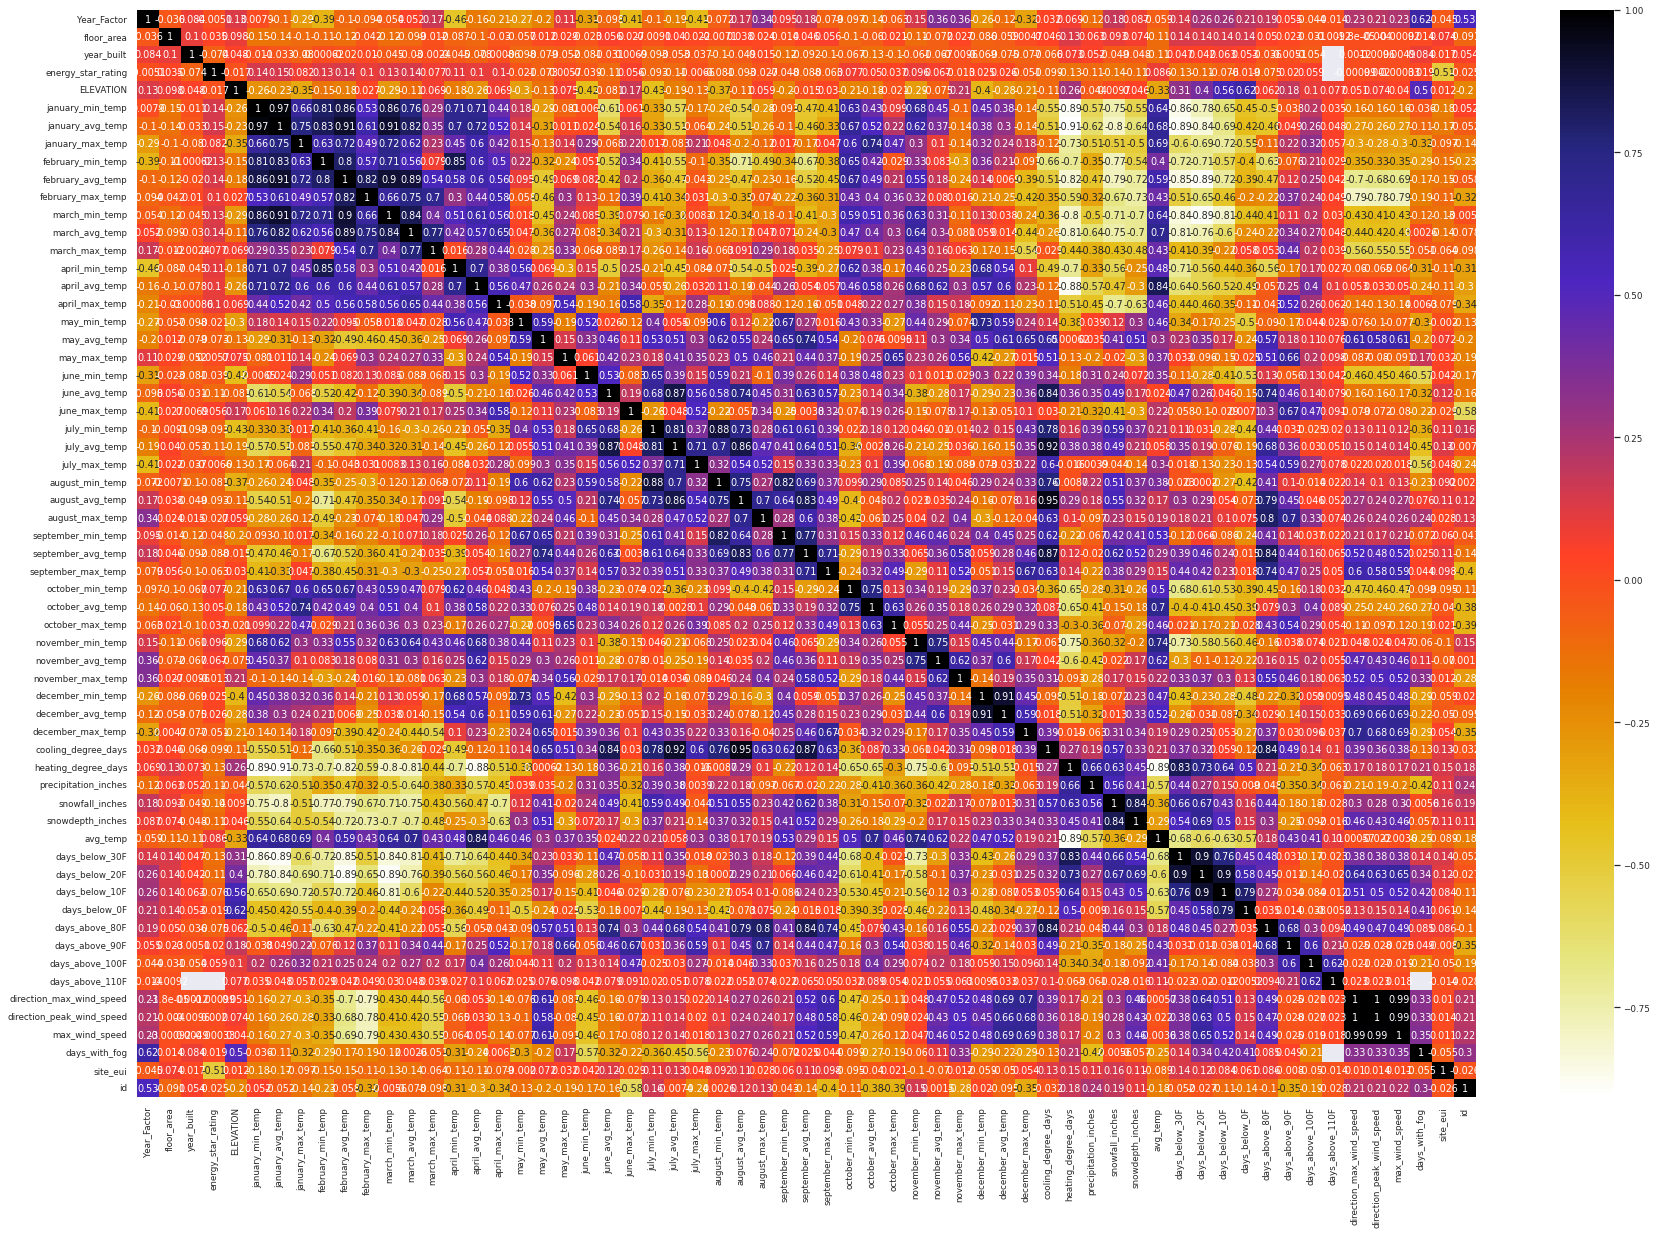

In [7]:
# heatmap to visualize multi collinearity in dataset
plt.figure(figsize=(30,20))
sns.set(font_scale=0.8)
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

- Dataset has multiple columns inter correlations which is not good for regression problem
- Temperature columns during winter, summer months correlate with each other

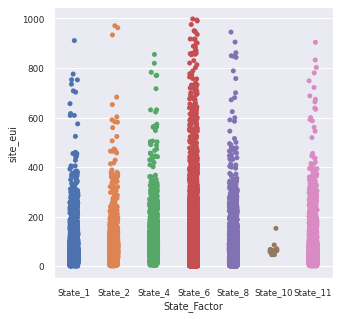

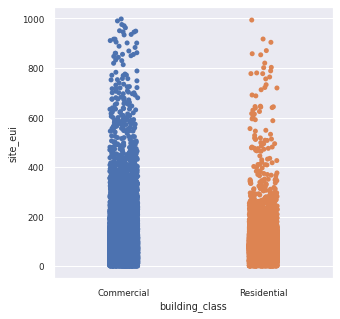

In [8]:
obj_cols = ['State_Factor','building_class']

for col in obj_cols:
    plt.figure(figsize=(5,5))
    sns.stripplot(x=col, y='site_eui', data=df)
    plt.show()

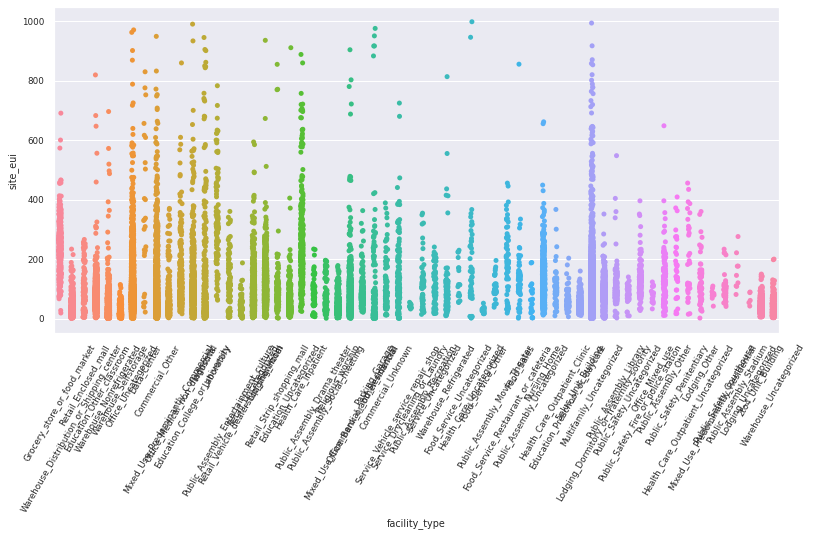

In [9]:
plt.figure(figsize=(13,6))
sns.stripplot(x='facility_type', y='site_eui', data=df)
plt.xticks(rotation=60)
plt.show()

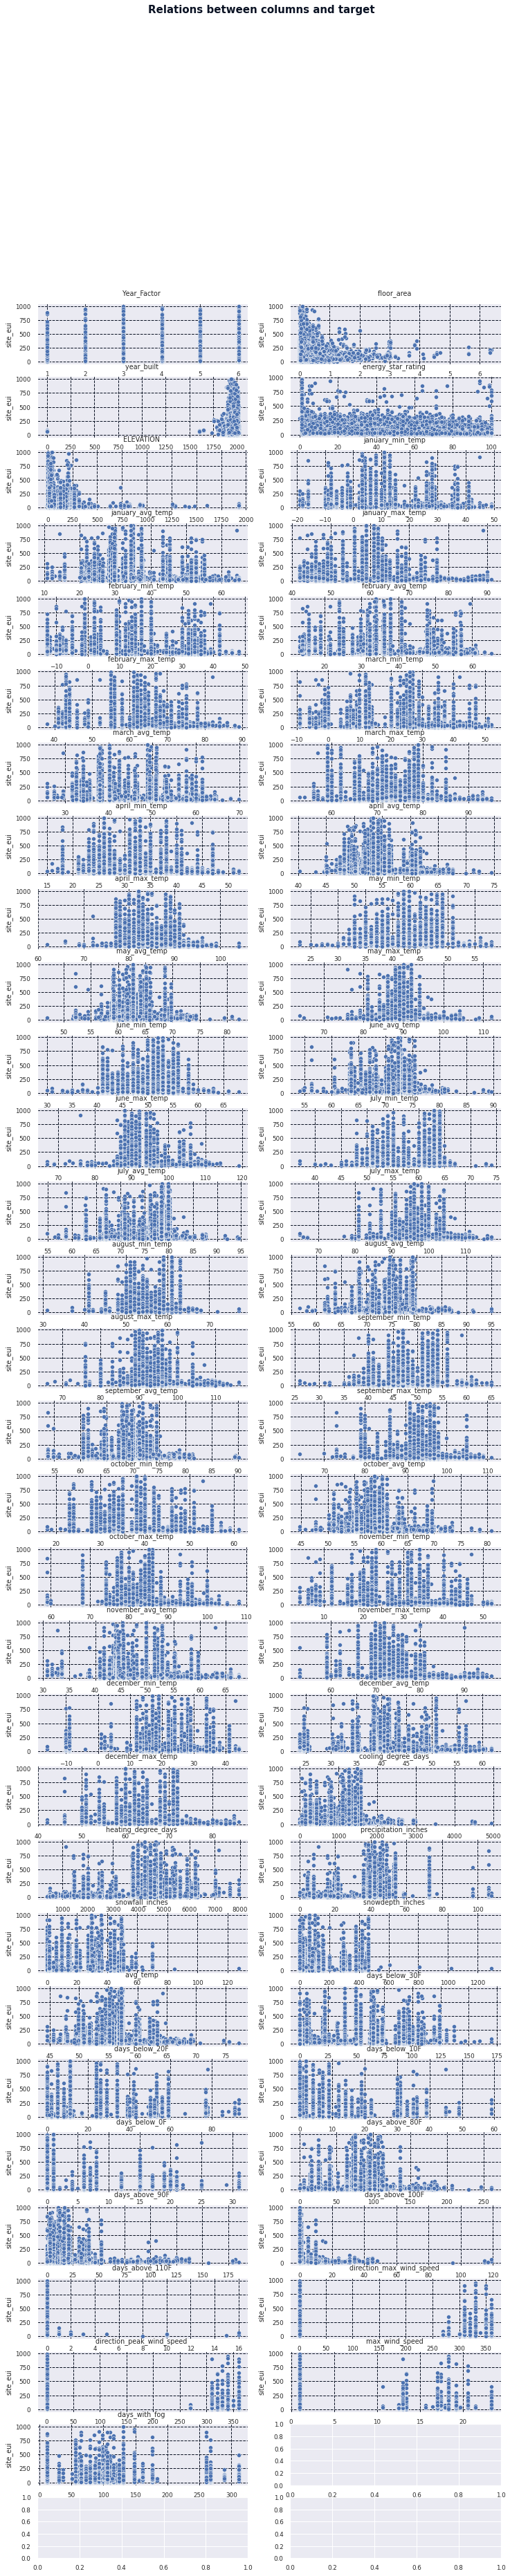

In [10]:
ndf = df.drop(['id','site_eui'], axis=1)
target = df['site_eui']

col_list = [col for col in ndf.columns if ndf[col].dtype != 'object']

fig, ax = plt.subplots(31,2, figsize=(12,60))
for idx, col in enumerate(col_list):
    sns.scatterplot(x=col, y='site_eui', data=df, ax=ax[idx//2, idx%2])
    ax[idx//2, idx%2].grid(visible=True, linestyle='--', color='#0b1324')
    ax[idx//2, idx%2].set_title(f'{col} ', pad=12)
    
plt.suptitle(f'Relations between columns and target', fontsize=15, fontweight='bold',
            color='#0b1324')
plt.show()

## Notes:

- 'ELEVATION' column has relation with target column
- There's no significant correlation between dependent columns and target column 
- Year factor and Year built columns do relate with target columns, we will drop them.
- 'days_with_fog' will be filled with knnimputer and other 3 columns with 'mode' value as most of the values are 1
- 'Energy star rating' filling using mean values as it relates to target variable

# Data preparation and pre-processing

## Handling missing values

In [11]:
# last 4 columns are having more than 50% of the missing values
ndf.isnull().sum()[ndf.isnull().sum() != 0]

year_built                    1837
energy_star_rating           26709
direction_max_wind_speed     41082
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
dtype: int64

In [12]:
# treat the missing values 

## Treating Multicollinearity

In [13]:
# VIF calculations (refer: Dinesh Kumar's Book)

## Feature engineering

In [14]:
# Summetion of seasonal (i.e. winter and summer) columns  to reduce columns and MC

In [15]:
# dataset scalling before PCA or kmeans

In [16]:
# or Dimentinality reduction techniques to reduce correlated features

In [17]:
# clustering to group by similar features